In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data
#can be found at https://www.kaggle.com/rikdifos/credit-card-approval-prediction
data = pd.read_csv('application_record.csv')
data2 = pd.read_csv('credit_record.csv')

In [3]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
data2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
data2['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [6]:
#convert target into binary classification 
#True if missed deadline once
#False if always on time
data2['binary'] = (data2['STATUS'] == '1') | (data2['STATUS'] == '2') | (data2['STATUS'] == '3') | (data2['STATUS'] == '4') | (data2['STATUS'] == '5')

In [7]:
#eliminates the duplicate ids in data2
#however onverts target to an int
temp = data2.groupby('ID').sum()

In [8]:
temp.head()

,MONTHS_BALANCE,binary
ID,,
5001711,-6,0.0
5001712,-171,0.0
5001713,-231,0.0
5001714,-105,0.0
5001715,-1770,0.0


In [9]:
#reconverts target into boolean
temp['STATUS'] = temp['binary'] > 0

In [10]:
#these columns are outdated
temp = temp.drop(['MONTHS_BALANCE', 'binary'], axis = 1)

In [11]:
#number of True ids in data set
sum(temp['STATUS'])

5350

In [12]:
temp.head()

,STATUS
ID,
5001711,False
5001712,False
5001713,False
5001714,False
5001715,False


In [13]:
#This merges both datasets, both will have matching ids that is combined through ID columns
df = data.merge(temp, how = 'inner', on = 'ID').drop('ID', axis = 1)

In [14]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,True
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,True
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False


In [15]:
#all good except for Occupation type which is NaN
df.count()

CODE_GENDER            36457
FLAG_OWN_CAR           36457
FLAG_OWN_REALTY        36457
CNT_CHILDREN           36457
AMT_INCOME_TOTAL       36457
NAME_INCOME_TYPE       36457
NAME_EDUCATION_TYPE    36457
NAME_FAMILY_STATUS     36457
NAME_HOUSING_TYPE      36457
DAYS_BIRTH             36457
DAYS_EMPLOYED          36457
FLAG_MOBIL             36457
FLAG_WORK_PHONE        36457
FLAG_PHONE             36457
FLAG_EMAIL             36457
OCCUPATION_TYPE        25134
CNT_FAM_MEMBERS        36457
STATUS                 36457
dtype: int64

In [16]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,True
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,True
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False


In [17]:
#drop all rows that have atleast one NaN, this is from occupation type
df = df.dropna()

In [18]:
#percentage of trues in the data
sum(df['STATUS'])/len(df)

0.122901249303732

Text(0.5, 1.0, 'Countplot of classification')

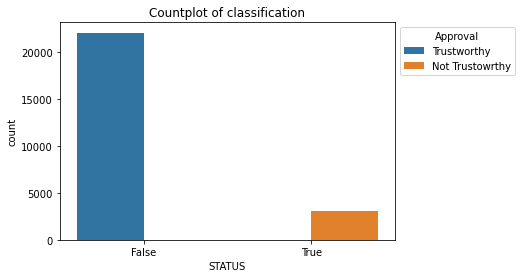

In [19]:
ax = sns.countplot(x = df['STATUS'] , hue = df['STATUS'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Trustworthy','Not Trustowrthy'], 
          bbox_to_anchor=(1,1), 
          title='Approval')
plt.title('Countplot of classification')

Text(0.5, 1.0, 'Amount of Total Income')

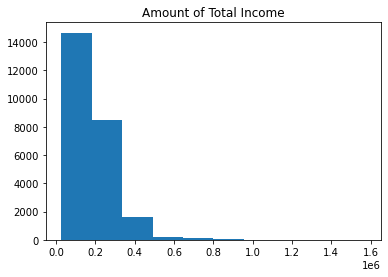

In [20]:
plt.hist(df['AMT_INCOME_TOTAL'])
plt.title('Amount of Total Income')

In [21]:
eps = 0.001 # 0 => 0.1¢
df['LogAmount'] = np.log(df.pop('AMT_INCOME_TOTAL') + eps)

Text(0.5, 1.0, 'Log Amount of Total Income')

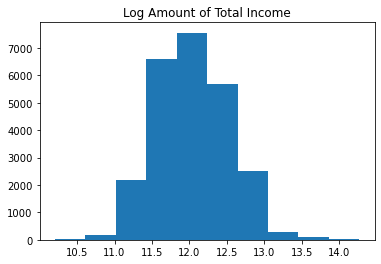

In [22]:
plt.hist(df['LogAmount'])
plt.title('Log Amount of Total Income')

In [23]:
#data is currently as Y (Yes) or N (no), converted to boolean
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'] == 'Y'
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'] == 'Y'

In [24]:
#onvert to boolean
df['CODE_GENDER'] = df['CODE_GENDER'] == 'M'

In [25]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,LogAmount
2,True,True,True,0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False,11.630709
3,False,False,True,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False,12.506177
4,False,False,True,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False,12.506177
5,False,False,True,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False,12.506177
6,False,False,True,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False,12.506177


In [26]:
#one hot encode all categorical variables
incomeType = pd.get_dummies(df['NAME_INCOME_TYPE'])
educationType = pd.get_dummies(df['NAME_EDUCATION_TYPE'])
family = pd.get_dummies(df['NAME_FAMILY_STATUS'])
housing = pd.get_dummies(df['NAME_HOUSING_TYPE'])
occupation = pd.get_dummies(df['OCCUPATION_TYPE'])
#need to drop the old columns
df = df.drop(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
              'OCCUPATION_TYPE'], axis = 1)

In [27]:
#combine all current features and one-hotencoded features
df = pd.concat([df, incomeType, educationType, family, housing, occupation], axis = 1)
#df = pd.concat([df, incomeType, educationType, housing, occupation], axis = 1)

In [28]:
sum(df['STATUS'])/len(df)

0.122901249303732

In [29]:
#recast boolean columns into int, tensorflow model was throwing errors
df['CODE_GENDER'] = df['CODE_GENDER'].astype('int')
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].astype('int')
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].astype('int')

In [30]:
#split into train and test
x_train, final, y_train, final_labels = train_test_split(df.drop(columns = ['STATUS']), df['STATUS'], test_size=0.15)

In [31]:
#graph feature importance
from sklearn import ensemble

randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(oob_score=True, random_state=42)
randomForest.fit(x_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

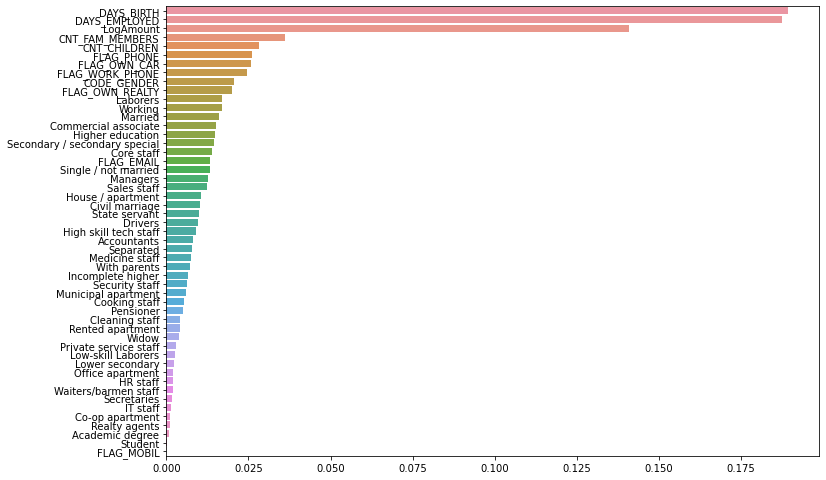

In [32]:
from matplotlib import pyplot
rf_feat_importance = pd.Series(data=randomForest.feature_importances_, index=x_train.columns).sort_values(ascending=False)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
# Impurity-based feature importance for the random forest
sns.barplot(ax = ax, x=rf_feat_importance.values, y=rf_feat_importance.index)
plt.title('Feature Importance')

In [33]:
#these columns removed for not accurate columns and 'CODE_GENDER' removed for ethical reasons
x_train = x_train.drop(['FLAG_MOBIL', 'FLAG_EMAIL', 'CODE_GENDER'], axis = 1)

In [34]:
#fig, ax = plt.subplots(figsize=(15, 25))
#tree.plot_tree(clf, filled=True, rounded=True, max_depth=3, fontsize=12, class_names=['bad', 'good'])
#plt.show()

In [35]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

In [36]:
#Split data into 4 parts
length = len(x_train)
splitDataX = []
splitDataY = []
splits = [0, length * 2//5, length * 3//5, length * 4//5]
for i in splits:
    splitDataX.append(x_train.iloc[i:(i+length//5), ])
    splitDataY.append(y_train.iloc[i:(i+length//5), ])


In [37]:
#combine data as cross validated points
cvX = []
cvY = []
for i in range(4):
    cvX.append(pd.concat([splitDataX[j] for j in range(4) if j != i], ignore_index = True))
    cvY.append(pd.concat([splitDataY[j] for j in range(4) if j != i], ignore_index = True))

In [38]:
#stored information
models = []
auc = []
names = []

In [39]:
from sklearn import metrics


In [40]:
#not used
def make_model(dataX, dataY, model, testX, testY):
    model.fit(dataX, dataY)
    return accuracy_score(testY, model.predict(testX))

In [41]:
#logisticregression
logistic = []
logisticauc = []
for i in range(4):
    log = LogisticRegression()
    log.fit(cvX[i], cvY[i])
    predict = log.predict(splitDataX[i])
    logistic.append(accuracy_score(splitDataY[i], predict))
    logisticauc.append(metrics.roc_auc_score(splitDataY[i], predict))
auc.append(logisticauc)
print(logisticauc)
print(logistic)
models.append(logistic)
names.append('Logistic')

[0.5, 0.5, 0.5, 0.5]
[0.87312734082397, 0.8698501872659176, 0.8759363295880149, 0.8773408239700374]


In [42]:
#DecisionTreeClassifier
from sklearn import tree
Dtree = []
Dtreeauc = []
for i in range(4):
    trees = tree.DecisionTreeClassifier()
    trees.fit(cvX[i], cvY[i])
    predict = trees.predict(splitDataX[i])
    Dtree.append(accuracy_score(splitDataY[i], predict))
    Dtreeauc.append(metrics.roc_auc_score(splitDataY[i], predict))
auc.append(Dtreeauc)
print(Dtreeauc)
print(Dtree)

models.append(Dtree)
names.append('Decision Tree')

[0.6218483820226942, 0.6109977464745103, 0.6374353337434325, 0.6308748889993239]
[0.8642322097378277, 0.8567415730337079, 0.8684456928838952, 0.8707865168539326]


In [43]:
#RandomClassifier
from sklearn.ensemble import RandomForestClassifier
Rtree = []
Rtreeauc = []
for i in range(4):
    treer = RandomForestClassifier()
    treer.fit(cvX[i], cvY[i])
    predict = treer.predict(splitDataX[i])
    Rtree.append(accuracy_score(splitDataY[i], predict))
    Rtreeauc.append(metrics.roc_auc_score(splitDataY[i], predict))
auc.append(Rtreeauc)
print(Rtreeauc)
print(Rtree)

models.append(Rtree)
names.append('Random Forest')

[0.6142086206384851, 0.6170458681493987, 0.6387392475015884, 0.6286701507979828]
[0.8742977528089888, 0.8712546816479401, 0.8764044943820225, 0.8813202247191011]


In [44]:
#SVM
from sklearn import svm
svms = []
svmsauc = []
for i in range(4):
    svc = svm.SVC()
    svc.fit(cvX[i], cvY[i])
    predict = svc.predict(splitDataX[i])
    svms.append(accuracy_score(splitDataY[i], predict))
    svmsauc.append(metrics.roc_auc_score(splitDataY[i], predict))
auc.append(svmsauc)
print(svmsauc)
print(svms)

models.append(svms)
names.append('SVM')

[0.5, 0.5, 0.5, 0.5]
[0.87312734082397, 0.8698501872659176, 0.8759363295880149, 0.8773408239700374]


In [45]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost = []
adaboostauc = []
for i in range(4):
    ada = AdaBoostClassifier()
    ada.fit(cvX[i], cvY[i])
    predict = ada.predict(splitDataX[i])
    adaboost.append(accuracy_score(splitDataY[i], predict))
    adaboostauc.append(metrics.roc_auc_score(splitDataY[i], predict))
auc.append(adaboostauc)
print(adaboostauc)
print(adaboost)
models.append(adaboost)
names.append('Adaboost')

[0.504998862321063, 0.5026978417266187, 0.5037735849056604, 0.4994663820704376]
[0.8735955056179775, 0.8705524344569289, 0.87687265917603, 0.8764044943820225]


In [46]:

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = []
knnauc = []
for i in range(4):
    k = KNeighborsClassifier(n_neighbors=5)
    k.fit(cvX[i], cvY[i])
    predict = k.predict(splitDataX[i])
    knn.append(accuracy_score(splitDataY[i], predict))
    knnauc.append(metrics.roc_auc_score(splitDataY[i], predict))
auc.append(knnauc)
print(knnauc)
print(knn)
models.append(knn)
names.append('KNN')

[0.552684427648566, 0.5622255693830296, 0.5792568800863225, 0.5668010216135629]
[0.8604868913857678, 0.8623595505617978, 0.8700842696629213, 0.864934456928839]


In [47]:
#pip3 install tensorflow
#import tensorflow as tf
#from tensorflow import keras
#creates my tensorflow model with the same layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics as m
def make_model(n):
    model = Sequential()
    model.add(Dense(44, input_dim=n, activation='relu'))
#    model.add(Dense(60, activation='selu'))
    model.add(Dense(30, activation='relu'))
#    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [m.FalseNegatives(), m.Precision(thresholds=0.80), m.AUC()])
    return model

In [48]:
#tensorflow
tensor = []
tensorauc = []
for i in range(4):
    basic = make_model(len(x_train.columns))
    basic.fit(cvX[i], cvY[i], epochs=25, batch_size=8, verbose = 0)
    predict = basic.predict_classes(splitDataX[i])
    tensor.append(accuracy_score(splitDataY[i], predict))
    tensorauc.append(metrics.roc_auc_score(splitDataY[i], predict))
auc.append(tensorauc)
print(tensorauc)
print(tensor)
models.append(tensor)
names.append('Sequential')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0.5, 0.5, 0.5, 0.5]
[0.87312734082397, 0.8698501872659176, 0.8759363295880149, 0.8773408239700374]


In [49]:
#visually decipherable table with information
import numpy as np
view = {}
for i, j, z in zip(names, models, auc):
    view[i] = [np.mean(j), np.std(j), np.mean(z), np.std(z)]
pd.DataFrame(view, index = ['Accuracy Mean', 'Accuracy Standard Deviation', 'AUC Mean', 
                            'AUC Standard Deviation']).transpose()

,Accuracy Mean,Accuracy Standard Deviation,AUC Mean,AUC Standard Deviation
Logistic,0.874064,0.002867,0.500000,0.000000
Decision Tree,0.865051,0.005342,0.625289,0.009935
Random Forest,0.875819,0.003666,0.624666,0.009766
SVM,0.874064,0.002867,0.500000,0.000000
Adaboost,0.874356,0.002529,0.502734,0.002055
KNN,0.864466,0.003607,0.565242,0.009561
Sequential,0.874064,0.002867,0.500000,0.000000


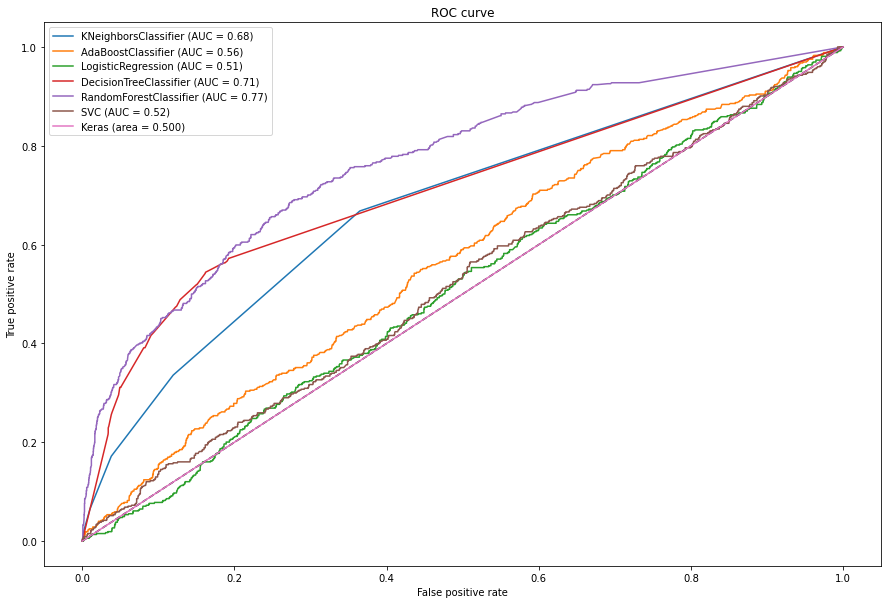

In [50]:
#fig, ax = plt.subplots(figsize=(15, 10))
fig, axs = plt.subplots(1, figsize = (15, 10))
metrics.plot_roc_curve(k, splitDataX[3], splitDataY[3], ax = axs)
metrics.plot_roc_curve(ada, splitDataX[3], splitDataY[3], ax = axs)
metrics.plot_roc_curve(log, splitDataX[3], splitDataY[3], ax = axs)
metrics.plot_roc_curve(trees, splitDataX[3], splitDataY[3], ax = axs)
metrics.plot_roc_curve(treer, splitDataX[3], splitDataY[3], ax = axs)
metrics.plot_roc_curve(svc, splitDataX[3], splitDataY[3], ax = axs)

from sklearn.metrics import roc_curve
y_pred_keras = basic.predict(x_train).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_pred_keras)
from sklearn.metrics import auc as aucplot
auc_keras = aucplot(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label = 'Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [51]:
#Random Forest Classifier is chosen and ran on the final data
final = final.drop(['FLAG_MOBIL', 'FLAG_EMAIL', 'CODE_GENDER'], axis = 1)
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_labels = model.predict(final)

0.6426086045311895
0.8806682577565632
[[3173  150]
 [ 300  148]]


Text(0.5, 1.0, 'Random Forest')

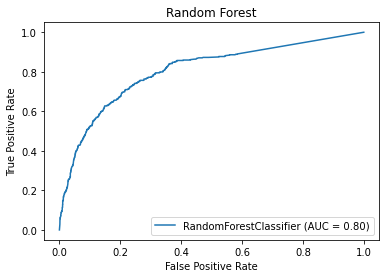

In [52]:
print(metrics.roc_auc_score(final_labels, pred_labels))
print(accuracy_score(final_labels, pred_labels))
print(metrics.confusion_matrix(final_labels, pred_labels))
metrics.plot_roc_curve(model, final, final_labels)
plt.title('Random Forest')

[Text(366.1875, 489.24, 'X[46] <= 0.5\ngini = 0.211\nsamples = 13500\nvalue = [18796, 2567]\nclass = Trustworth'),
 Text(209.25, 380.52000000000004, 'X[2] <= 9.5\ngini = 0.21\nsamples = 13199\nvalue = [18387, 2487]\nclass = Trustworth'),
 Text(167.4, 271.8, 'X[37] <= 0.5\ngini = 0.21\nsamples = 13196\nvalue = [18386, 2485]\nclass = Trustworth'),
 Text(83.7, 163.08000000000004, 'X[7] <= 2.5\ngini = 0.209\nsamples = 13157\nvalue = [18341, 2473]\nclass = Trustworth'),
 Text(41.85, 54.360000000000014, '\n  (...)  \n'),
 Text(125.55000000000001, 54.360000000000014, '\n  (...)  \n'),
 Text(251.10000000000002, 163.08000000000004, 'X[18] <= 0.5\ngini = 0.332\nsamples = 39\nvalue = [45, 12]\nclass = Trustworth'),
 Text(209.25, 54.360000000000014, '\n  (...)  \n'),
 Text(292.95, 54.360000000000014, '\n  (...)  \n'),
 Text(251.10000000000002, 271.8, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Not Trustworth'),
 Text(523.125, 380.52000000000004, 'X[4] <= -4382.0\ngini = 0.274\nsamples = 30

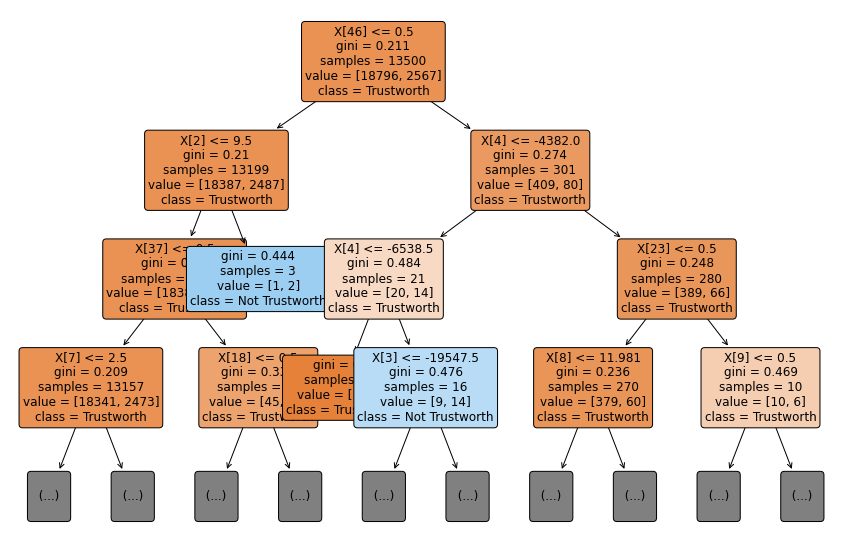

In [53]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(model.estimators_[0], filled=True, rounded=True, max_depth=3, 
               fontsize=12, class_names=['Trustworth', 'Not Trustworth'])